### Analyzing tweakreg shifts

Karl Gordon

12 Jun 2022

In [1]:
from tweakwcs import JWSTgWCS
from jwst import datamodels
import numpy as np
import glob

In [2]:
RAD2ARCSEC = 3600.0 * np.rad2deg(1.0)

filter = "F770W"
twfiles = np.sort(glob.glob(f"./{filter}/stage3/*wcs_tweakreg.fits"))

shifts = np.zeros((2, len(twfiles)))
for k, cfile in enumerate(twfiles):
    # extract x,y shifts from the aligned image:
    aligned_model = datamodels.open(cfile)
    matrix = aligned_model.meta.wcs.forward_transform['tp_affine'].matrix.value
    cshift = RAD2ARCSEC * aligned_model.meta.wcs.forward_transform['tp_affine'].translation.value
    shifts[:, k] = cshift
    print(cfile, cshift)

./F770W/stage3/jw02733002001_02101_00001_mirimage_fixed_wcs_tweakreg.fits [0.22987429 0.04040382]
./F770W/stage3/jw02733002001_02101_00002_mirimage_fixed_wcs_tweakreg.fits [ 0.17893764 -0.06851909]
./F770W/stage3/jw02733002001_02101_00003_mirimage_fixed_wcs_tweakreg.fits [ 0.1702776  -0.06170493]
./F770W/stage3/jw02733002001_02101_00004_mirimage_fixed_wcs_tweakreg.fits [ 0.16992581 -0.06648449]
./F770W/stage3/jw02733002001_02101_00005_mirimage_fixed_wcs_tweakreg.fits [ 0.1832277  -0.02761401]
./F770W/stage3/jw02733002001_02101_00006_mirimage_fixed_wcs_tweakreg.fits [ 0.17342965 -0.05131693]
./F770W/stage3/jw02733002001_02101_00007_mirimage_fixed_wcs_tweakreg.fits [ 0.17128566 -0.05763628]
./F770W/stage3/jw02733002001_02101_00008_mirimage_fixed_wcs_tweakreg.fits [ 0.17154314 -0.06254138]
./F770W/stage3/jw02733002002_02101_00001_mirimage_fixed_wcs_tweakreg.fits [ 0.17492886 -0.05067449]
./F770W/stage3/jw02733002002_02101_00002_mirimage_fixed_wcs_tweakreg.fits [ 0.17443543 -0.0623754 ]
./

0 0.17320409635878223 -0.06012765659475183


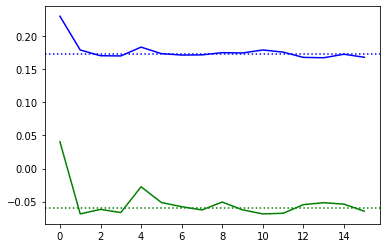

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(len(twfiles)), shifts[0, :], "b-")
plt.plot(range(len(twfiles)), shifts[1, :], "g-")

from astropy.stats import sigma_clip

# determine the aveage values for each tile
for k in range(1):
    k1 = k*16
    k2 = k1 + 16
    avex = np.average(sigma_clip(shifts[0, k1:k2]))
    avey = np.average(sigma_clip(shifts[1, k1:k2]))
    print(k, avex, avey)
    plt.axhline(avex, linestyle="dotted", color="b")
    plt.axhline(avey, linestyle="dotted", color="g")